In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [6]:
filename = 'chessboard.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

In [8]:
def nothing(x):
    pass

filename = 'im0.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 10, 1000, nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    if(threshold <= 1):
        threshold=1
    img = cv2.imread(filename)
    img[dst>1./threshold*dst.max()]=[0,0,255]
    cv2.imshow('image',img)
cv2.destroyAllWindows()


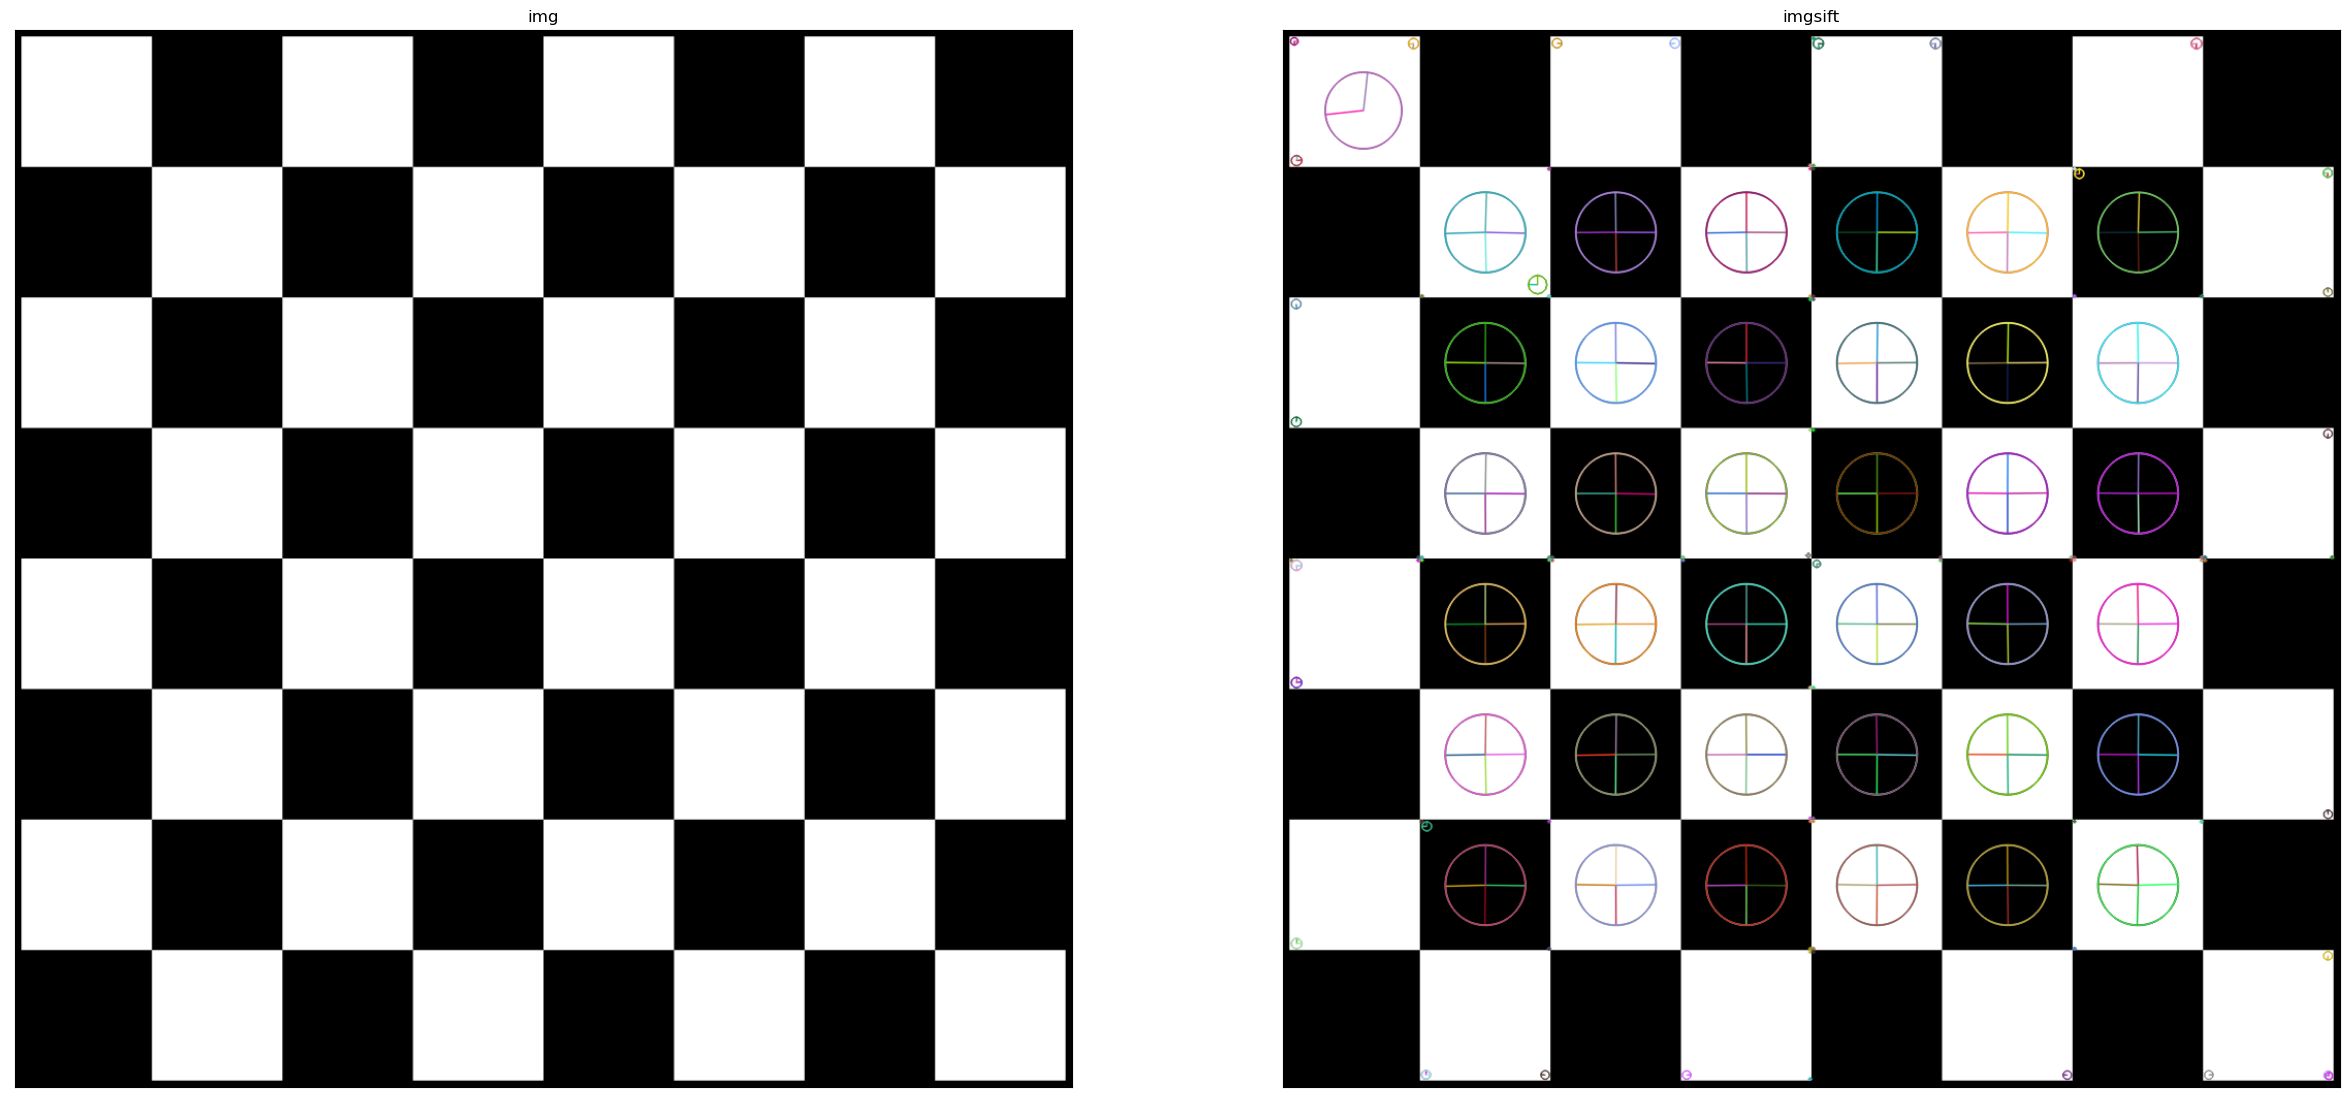

In [11]:
img = cv2.imread('chessboard.png')
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
imgsift = cv2.imread('chessboard.png')
imgsift=cv2.drawKeypoints(img,kp,imgsift,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize = (30,45))
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgsift,cmap = 'gray')
plt.title('imgsift'), plt.xticks([]), plt.yticks([])
plt.show()
